In [2]:
# relevant modules/libraries

import math  # same functionality as matplotlib.pyplot, not needed if you import matplotlib
import statistics as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# LECTURE 1

Different ways of changing fonts:

Changing all text in same markdown cell after the command:
<font size = "10">  

hello
hi

# Big text

## Slightly smaller

###### Smallest

In [1]:
print("Hello World!")

Hello World!


# LECTURE 2

### Basic math:

In [2]:
# exponent
print(2**3)

# absolute value
print(abs(-5))

8
5


### Statistics module:

In [5]:
print(statistics.mean([1, 7, 3, 5, 9, 1, 12]))
print(statistics.median([1, 7, 3, 5, 9, 1, 12]))
print(statistics.geometric_mean([1, 7, 3, 5, 9, 1, 12]))

5.428571428571429
5
3.795163026589841


### Reading in datasets:

In [9]:
# use read_csv function from pandas
carfeatures = pd.read_csv("data_subfolder/features.csv")

<font size="4"> 

You can open the datasets in the current environment
- Click on the "Jupyter Variables" button in the top bar to open a panel

- Click on the icon to the left of "carfeatures" in the "Jupyter: Variables" tab

DataWrangler will open a window showing the data
- Each row is an observation (a car)
- Each column is the value of a variable (a feature of that car)

### Data Analysis

#### Looking at certain rows/columns of your data

In [10]:
# looking at some rows of your data

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle id
0,18.0,8,307,130,3504,12.0,C-1689780
1,15.0,8,350,165,3693,11.5,B-1689791
2,18.0,8,318,150,3436,11.0,P-1689802
3,16.0,8,304,150,3433,12.0,A-1689813
4,17.0,8,302,140,3449,10.5,F-1689824
...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103
394,44.0,4,97,52,2130,24.6,V-1694114
395,32.0,4,135,84,2295,11.6,D-1694125
396,28.0,4,120,79,2625,18.6,F-1694136


In [11]:
# looking at a single column of your data

display(carfeatures['cylinders'])  # use brackets and quotes

0      8
1      8
2      8
3      8
4      8
      ..
393    4
394    4
395    4
396    4
397    4
Name: cylinders, Length: 398, dtype: int64

#### Frequency tables

In [13]:
# Frequency tables

# Use: pd.crosstab

# Purpose: gives you the counts for each category of a given variable

table = pd.crosstab(index = carfeatures["cylinders"],  # index is the variable you want to look at
                    columns = "count")  # columns is what you want to name your summary (can be "frequency", "proportion", etc)

display(table)

col_0,count
cylinders,
3,4
4,204
5,3
6,84
8,103


#### #Note: help() function
##### Can help us learn more about a command

In [17]:
help(pd.crosstab)
# tells us the required arguments as well as other optional arguments

# note: for crosstab,
# you don't need to explicitly write "index = " and "columns = "
# because they are required arguments

# can rewrite like this:
table = pd.crosstab(carfeatures["cylinders"], "count")  # make sure the arguments are in the correct order though!
display(table)


Help on function crosstab in module pandas.core.reshape.pivot:

crosstab(
    index,
    columns,
    values=None,
    rownames=None,
    colnames=None,
    aggfunc=None,
    margins: 'bool' = False,
    margins_name: 'Hashable' = 'All',
    dropna: 'bool' = True,
    normalize: "bool | Literal[0, 1, 'all', 'index', 'columns']" = False
) -> 'DataFrame'
    Compute a simple cross tabulation of two (or more) factors.

    By default, computes a frequency table of the factors unless an
    array of values and an aggregation function are passed.

    Parameters
    ----------
    index : array-like, Series, or list of arrays/Series
        Values to group by in the rows.
    columns : array-like, Series, or list of arrays/Series
        Values to group by in the columns.
    values : array-like, optional
        Array of values to aggregate according to the factors.
        Requires `aggfunc` be specified.
    rownames : sequence, default None
        If passed, must match number of row ar

col_0,count
cylinders,
3,4
4,204
5,3
6,84
8,103


#### Contingency tables

In [18]:
# Contigency tables

# Use: pd.crosstab but set the columns argument to your second variable

table_2 = pd.crosstab(index = carfeatures["cylinders"], 
                      columns = carfeatures["mpg"]) # second variable
display(table_2)

# ie. there is 1 observation that has 8 cylinders and 9.0 miles per gallon
# recall from QTM 100!

mpg,9.0,10.0,11.0,12.0,13.0,14.0,14.5,15.0,15.5,16.0,...,39.4,40.8,40.9,41.5,43.1,43.4,44.0,44.3,44.6,46.6
cylinders,,,,,,,,,,,,,,,,,,,,,
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,4,0,5,...,0,0,0,0,0,0,0,0,0,0
8,1,2,4,6,20,19,1,12,5,8,...,0,0,0,0,0,0,0,0,0,0


#### Summary statistics

In [22]:
# Summary statistics for every variable

# Use: .describe()

# Purpose: for numerical variables, computes the count, mean, std, min, 25% quantile, 50%, 75%, max
# ignores all non-numeric variables and any variables with NA

display(carfeatures.describe())


# changing the percentiles shown (from 25% and 75% -> 33% and 66%)
display(carfeatures.describe(percentiles = [.33, .5, .66]))  # specify values for percentiles argument

,mpg,cylinders,displacement,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,2970.424623,15.568090
std,7.815984,1.701004,104.268683,846.841774,2.757689
min,9.000000,3.000000,68.000000,1613.000000,8.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


,mpg,cylinders,displacement,weight,acceleration
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.427136,2970.424623,15.568090
std,7.815984,1.701004,104.268683,846.841774,2.757689
min,9.000000,3.000000,68.000000,1613.000000,8.000000
33%,19.000000,4.000000,116.030000,2391.040000,14.500000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000
66%,26.600000,6.000000,232.000000,3278.080000,16.500000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


#### #Note: Rounding

In [20]:
# Rounding

# Use: round()

display(round(carfeatures.describe(), 2))  # rounding to 2 digits

,mpg,cylinders,displacement,weight,acceleration
count,398.00,398.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,2970.42,15.57
std,7.82,1.70,104.27,846.84,2.76
min,9.00,3.00,68.00,1613.00,8.00
25%,17.50,4.00,104.25,2223.75,13.82
50%,23.00,4.00,148.50,2803.50,15.50
75%,29.00,8.00,262.00,3608.00,17.18
max,46.60,8.00,455.00,5140.00,24.80


#### Plotting

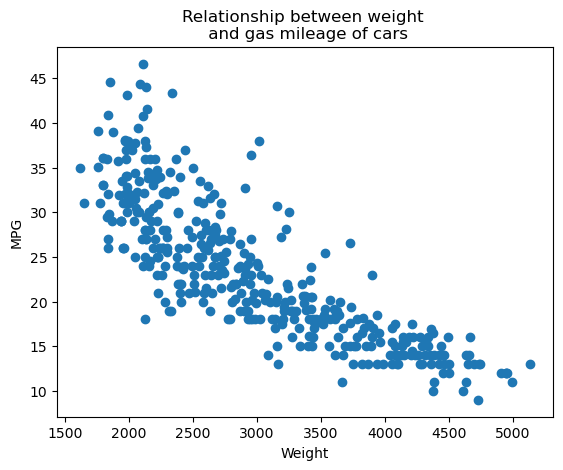

In [23]:
# Scatter plots

# Use: plt

plt.scatter(x = carfeatures['weight'], y = carfeatures['mpg'])  # specify your x and y variables
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("Relationship between weight \n and gas mileage of cars")
plt.show()  # to suppress extra message/output



# LECTURE 4

### Types of objects/data

In [ ]:
# Seeing what an object's type/class is

# Use: type()

print(type(3))  # "int" = integers (whole numbers)
print(type(3.25))  # "float" = floating-point numbers (numbers with decimals)
print(type("Hello World!"))  # "str" = strings (text)
print(type(print))  # built in function
print(type(math))  # module/library

<class 'int'>
<class 'float'>
<class 'str'>
<class 'builtin_function_or_method'>
<class 'module'>


#### #Note: python by default only prints the last output of each cell

##### Make sure to use print() on each line that you want to be printed

### Defining strings

In [31]:
# can use single or double quotes

# to define a quote character inside a string:
print('In Python, "classes" and "types" are essentially synonymous.')
print('In today\'s lecture we learned that "classes" and "types" are essentially synonymous.')  # use backslash when using same type of quotation in one string

In Python, "classes" and "types" are essentially synonymous.
In today's lecture we learned that "classes" and "types" are essentially synonymous.


### Variables

#### Defining a variable

In [33]:
x = 3
y = 3.25

print(x)
print(y)

3
3.25


#### #Note: variables are case sensitive!

In [39]:
oioi = 3
Oioi = 5

print(oioi)
print(Oioi)

# these are two different variables!

3
5


### Lists

#### Defining a list

In [41]:
# create using square brackets

secondyr_dorms = ["woodies", "clifton", "few", "evans", "harris"]

<class 'list'>


In [42]:
# length of a list

# Use: len()

print(len(secondyr_dorms))

5


#### Accessing a specific element from a list

In [43]:
# use square brackets

print(secondyr_dorms[2])  # index starts from zero

few


In [45]:
# can save certain index to a variable 
# in order to access the corresponding element of the list

susanna_ind = 4
print(secondyr_dorms[susanna_ind])

harris


#### Changing an element of a list

In [50]:
secondyr_dorms[0] = "Woodruff Residential Center"  # renaming from "woodies" to "Woodruff Residential Center"
print(secondyr_dorms)

['Woodruff Residential Center', 'clifton', 'few', 'evans', 'harris']


#### #Note: Lists can contain objects of different types as well as existing variables

In [55]:
# you can even have a list where one of the elements is itself a list

woodies_different_names = ["woodies", "Woodruff Residential Center", "WREC"]

secondyr_dorms[0] = woodies_different_names
print(secondyr_dorms)

[['woodies', 'Woodruff Residential Center', 'WREC'], 'clifton', 'few', 'evans', 'harris']


#### Double indexing

In [59]:
# extracting items from a sublist

print(secondyr_dorms[0][1])  # extracting second element of woodies_different_names sublist

Woodruff Residential Center


# LECTURE 5

### Tuples

#### Defining a tuple

In [61]:
# Use: parentheses

tuple_of_numbers = (5, 3, 2, 0)
print(tuple_of_numbers)

# Can also create without parentheses

tuple_of_numbers = 5, 3, 2, 0
print(tuple_of_numbers)

(5, 3, 2, 0)
(5, 3, 2, 0)


#### #Note: tuples are IMMUTABLE (cannot be changed once they are created)

#### In contrast, lists are MUTABLE

In [64]:
# this will give us an error because we cannot change the elemtns of a tuple

tuple_of_numbers[3] = 55

TypeError: 'tuple' object does not support item assignment

### Strings

#### Defining a string

In [69]:
# Use: quotation marks

my_name = "Angie Chen"

#### #Note: strings are IMMUTABLE

#### Subsetting a string

In [70]:
# Use: square brackets

print(my_name[0])

A


### Concatenation

In [71]:
# Use: +

list_1 = [2, 3, 5, 11]
list_2 = [1, -4, 2, 0]

list_3 = list_1 + list_2

print(list_3)

[2, 3, 5, 11, 1, -4, 2, 0]


#### #Note: when defining tuple of length 1, need to put comma after the element

##### Or else it will be considered as an integer

In [78]:
my_tuple = (1,) + (2, 3, 4, 5, 6, 7, 8, 9)
print(my_tuple)

my_list = [1] + [2, 3, 4, 5, 6, 7, 8, 9]  # don't need comma for lists tho!
print(my_list)

(1, 2, 3, 4, 5, 6, 7, 8, 9)
[1, 2, 3, 4, 5, 6, 7, 8, 9]


### Visualizations using lists

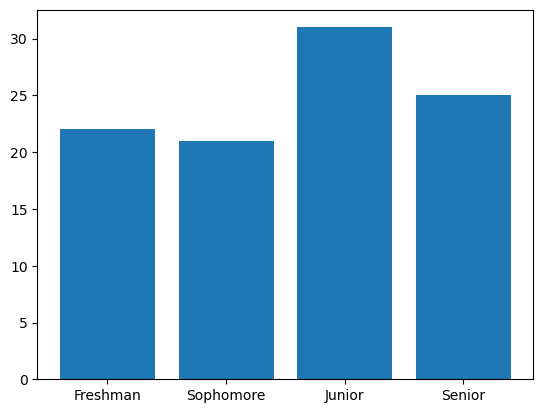

In [80]:
# creating a bar plot

categories = ["Freshman", "Sophomore", "Junior", "Senior"]
count = [22, 21, 31, 25]

plt.bar(x = categories, height = count)
plt.show()

### Arrays

* Used for doing operations entry by entry
* We will be using the numpy array from the NumPy library

#### Defining an array

In [3]:
# Use: list inside np.array()

myarray = np.array([6.7, 4.2, 6.9, -4.0])

#### Indexing arrays

In [4]:
# use []

print(myarray[0])

6.7


#### Vector Addition

In [6]:
# Use: + operator

array1 = np.array([1, 2, 3])
array2 = np.array([3, 4, 5])

print(array1 + array2)

# can also add constant element-wise

print(array1 + 3)

[4 6 8]
[4 5 6]


#### Mathematical functions in NumPy

In [7]:
print(np.log(2))  # log(2)
print(np.exp(2))
print(np.sin(2))
print(np.cos(2))
print(np.sqrt(2))

0.6931471805599453
7.38905609893065
0.9092974268256817
-0.4161468365471424
1.4142135623730951


#### Mathematical constants in NumPy

In [8]:
print(np.pi) # pi = circle's circumference/circle's diameter

print(np.e) # Euler's number = limit of (1 + 1/n)^n as n goes to infinity

print(np.exp(1)) # another way to calculate Euler's number

3.141592653589793
2.718281828459045
2.718281828459045


#### Plotting functions using NumPy arrays

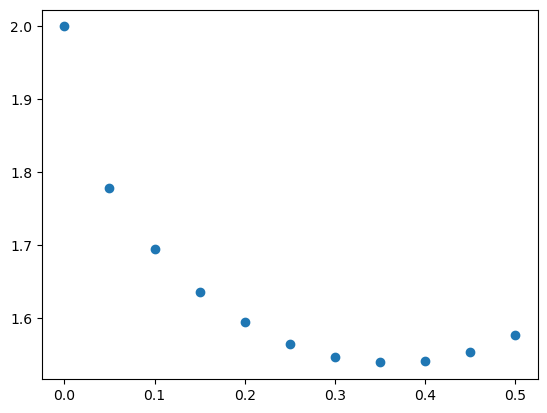

In [9]:
# creating array
t_vals = np.array([0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5])

# Evaluate function and create new array 
g_of_t = np.exp(t_vals**2) - np.sqrt(t_vals) + 1

# Use plt.scatter to create scatter plot
plt.scatter(x = t_vals, y = g_of_t)
plt.show()

# LECTURE 7

### Comparison operators

In [ ]:
print(5 > 3)  # greater than
print(0 < -2.5)  # less than
print(10 >= 1)  # greater than or equal to
print(10 <= 5 + 5)  # less than or equal to
print(3 - 2 == 7)  # equal to
print(10/5 != 2)  # not equal to

In [11]:
# for strings, each character in the string has to match
# order matters!

print("ab" == "ba")

False


In [12]:
# for arrays, comparison is element wise
# a boolean expression is returned for each element

vec_a = np.array([1,2,3])
vec_b = np.array([1,2,4])

print(vec_a == vec_b)

[ True  True False]


### "in" 
(similar to %in% in R)

In [15]:
# checking if given characters are in string

sentence = "oioioi silly baka"

keyword = "oioioi"
print(keyword in sentence)

keyword = "oioi"
print(keyword in sentence)

keyword = "Silly"
print(keyword in sentence)

True
True
False


In [16]:
# checking if word is in list

word_list = ["oioioi", "silly", "baka"]

keyword = "oioi"
print(keyword in word_list)  # looks for exact matches when given list

False


In [18]:
# checking if number is in array

given_array = np.array([1.0, 3.0, -17, 12])
print(1 in given_array)

print(22 in given_array)

True
False


### Logical operators
Used for combining conditional statements

not

In [21]:
word = "oioioi"
mystatement = word == "oioi"  # should be false

print(mystatement)

print(not mystatement)

False
True


and

In [24]:
height = 184

team_heights = [176, 180, 184, 186]

print((height > 180) and (height in team_heights))  
# both statements must be true

True


or

In [25]:
height = 183

team_heights = [176, 180, 184, 186]

print((height > 180) or (height in team_heights))  
# only one statement needs to be true

True


### Control statements

#### if

In [26]:
mynum = 8

if mynum > 5:
    print("greater than 5")

greater than 5


#### else

In [28]:
mynum = 2

if mynum > 5:
    print("greater than 5")
else:
    print("less than 5")

less than 5


#### elif

In [33]:
mynum = 5

if mynum > 6:
    print("greater than 6")
elif mynum > 4:
    print("greater than 4, less than 6")
else:
    print("less than 4")

greater than 4, less than 6


# LECTURE 8

### Debug mode

In [ ]:
# 1) show line numbers by holding mouse under the run button for each cell, and typing "L"
# 2) hover next to a line and click red dot to add breakpoint
# 3) hover over the dropdown arrow next to the run button and select "Debug Mode"
# 4) in debug mode, you can run from one breakpoint to another using "Continue" 
#    and line by line using "Step Over" (all found at top of screen)

In [34]:
# deleting variables
oioi = 3
print(oioi)

del oioi
print(oioi)

3


NameError: name 'oioi' is not defined

### for loops

In [37]:
# looping over a list

customer_list = ["Angie", "Michelle", "Gabby", "Susanna"]

for customer_name in customer_list:
    print("Dear " + customer_name + ", oioi baka")

Dear Angie, oioi baka
Dear Michelle, oioi baka
Dear Gabby, oioi baka
Dear Susanna, oioi baka


In [38]:
# looping over list along with an index

customer_list = ["Angie", "Michelle", "Gabby", "Susanna"]

index = 0

for customer_name in customer_list:
    print("Dear " + customer_name + ", you are the number " + str(index) + " oioi baka")
    index = index + 1

Dear Angie, you are the number 0 oioi baka
Dear Michelle, you are the number 1 oioi baka
Dear Gabby, you are the number 2 oioi baka
Dear Susanna, you are the number 3 oioi baka


In [39]:
# looping over list using index

customer_list = ["Angie", "Michelle", "Gabby", "Susanna"]

N = len(customer_list)

for index in range(N):
    print("Dear " + customer_list[index] + ", you are the number " + str(index) + " oioi baka")
    index = index + 1

Dear Angie, you are the number 0 oioi baka
Dear Michelle, you are the number 1 oioi baka
Dear Gabby, you are the number 2 oioi baka
Dear Susanna, you are the number 3 oioi baka


### while loops
use when we don't know how many iterations to run

In [42]:
candidate_pool = ["Angie", "Susanna", "Gabby", "Michelle"]
picked_candidates = []

index = 0

while len(picked_candidates) < 3:  # only runs when certain condition is true
    picked_candidates.append(candidate_pool[index])
    index = index + 1

print(picked_candidates)

['Angie', 'Susanna', 'Gabby']
